In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
# Load the uploaded Excel file
file_path = 'combined_averages.xlsx'
#Columnas a comparar
columnas = ["Simulated-annealing-joa", "Particle-swarp-optimization30", "Particle-swarp-optimization50", "Particle-swarp-optimization70" ]
data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of each sheet to understand the structure of the data
sheet_names = data.keys()
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
sheet_names, data_preview

(dict_keys(['Tiempos', 'Nodos']),
 {'Tiempos':    Problema  Abstaylor  Hybrid-sa-pso30  Hybrid-sa-pso30-5it  Hybrid-sa-pso50  \
  0      chem    2608.92          4348.76              4239.11          5429.88   
  1    chem-1    2744.01          4303.91              4216.72          5261.08   
  2   chembis    1367.06          2163.24              2075.99          2733.06   
  3  dualc5\n     119.51           186.74               123.91           219.76   
  4  dualc8\n     480.74          1677.91               858.21          2513.53   
  
     Hybrid-sa-pso50-5it  Hybrid-sa-pso70  Hybrid-sa-pso70-5it  \
  0              4750.24          6530.78              5349.71   
  1              4787.63          6222.78              5436.93   
  2              2532.91          3332.96              2882.73   
  3               145.05           221.22               149.63   
  4              1191.94          3017.50              1323.23   
  
     Particle-swarp-optimization30  Particle-swarp-opti

In [114]:
# Obtener la lista de nombres de los problemas y guardarla en una lista
problemas = data['Tiempos']['Problema'].tolist()

# Mostrar la lista de problemas
problemas

['chem',
 'chem-1',
 'chembis',
 'dualc5\n',
 'dualc8\n',
 'ex14_2_7',
 'ex2_1_7',
 'ex2_1_8',
 'ex2_1_9',
 'ex2_1_9bis',
 'ex6_1_3',
 'ex6_1_3bis',
 'ex6_2_10',
 'ex6_2_12',
 'ex6_2_6',
 'ex6_2_8',
 'ex6_2_9',
 'ex8_4_4bis',
 'ex8_5_1bis',
 'himmel16',
 'hs088\n',
 'hs093\n',
 'hs102\n',
 'hs103\n',
 'hs108\n',
 'hs113\n',
 'launch',
 'mistake\n',
 'odfits\n',
 'sambal']

In [115]:
# borrar las demas columnas
for sheet in sheet_names:
    data[sheet] = data[sheet][columnas]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
data_preview


{'Tiempos':    Simulated-annealing-joa  Particle-swarp-optimization30  \
 0                  2616.91                        3646.15   
 1                  2758.32                        4112.10   
 2                  1378.10                        2191.57   
 3                   125.95                         151.60   
 4                   482.42                        1166.96   
 
    Particle-swarp-optimization50  Particle-swarp-optimization70  
 0                        5028.04                        5774.16  
 1                        5074.95                        5884.81  
 2                        2681.68                        3104.37  
 3                         139.18                         131.67  
 4                        1296.97                        1234.64  ,
 'Nodos':    Simulated-annealing-joa  Particle-swarp-optimization30  \
 0                 913178.0                       907333.6   
 1                 913178.0                       907333.6   
 2               

In [116]:
# Normalizar filas
for sheet in sheet_names:
    data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Simulated-annealing-joa  Particle-swarp-optimization30  \
 0                  0.153347                       0.213659   
 1                  0.154700                       0.230626   
 2                  0.147300                       0.234249   
 3                  0.229668                       0.276441   
 4                  0.115384                       0.279111   
 5                  0.074869                       0.235273   
 6                  0.281703                       0.208459   
 7                  0.270188                       0.233362   
 8                  0.311038                       0.217679   
 9                  0.343489                       0.274174   
 10                 0.160381                       0.246611   
 11                 0.155700                       0.256640   
 12                 0.157646                       0.237522   
 13                 0.162444                       0.253731   
 14                 0.177960                

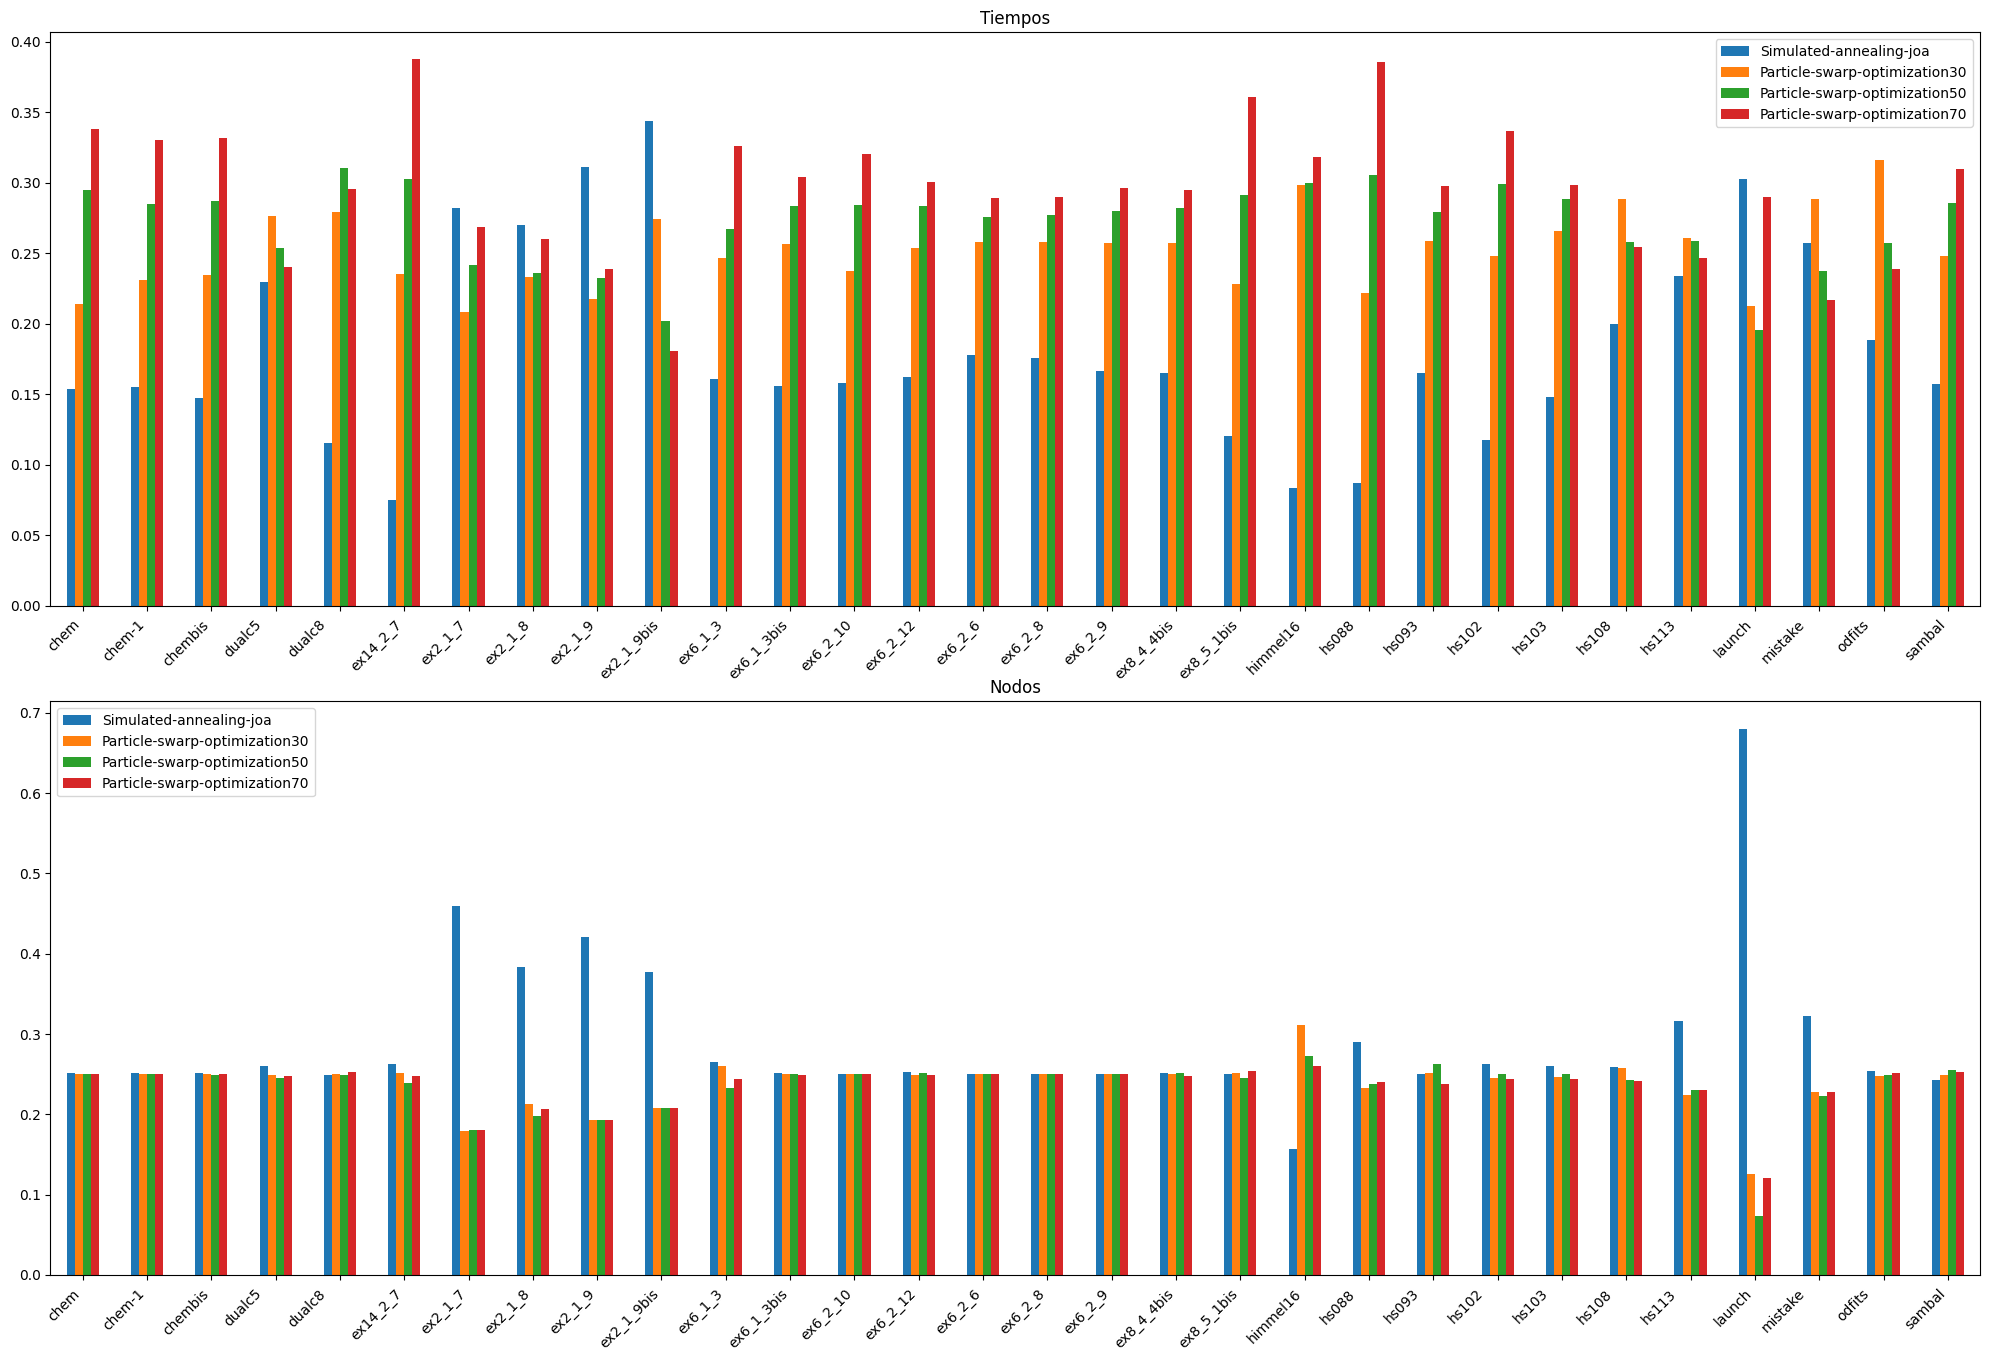

In [117]:
fig, axs = plt.subplots(2, 1, figsize=(20, 16))  # Aumenté la altura de la figura

data['Tiempos'].plot(kind='bar', ax=axs[0])
data['Nodos'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Tiempos')
axs[1].set_title('Nodos')

# Rotar y alinear las etiquetas del eje X
for ax in axs:
    ax.set_xticklabels(problemas, rotation=45, ha='right')
    ax.tick_params(axis='x', which='major', pad=5)  # Aumentar el espacio entre las etiquetas y el eje

# Ajustar el espacio entre los subplots y los bordes de la figura
plt.tight_layout()

# Añadir más espacio en la parte inferior para las etiquetas
plt.subplots_adjust(bottom=0.2)

plt.show()

In [118]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Cargar el archivo Excel
# file_path = 'combined_averages.xlsx'

# # Columnas a comparar
# columnas = ["Particle-swarp-optimization30", "Particle-swarp-optimization50", "Particle-swarp-optimization70", "Hybrid-sa-pso30", "Hybrid-sa-pso50", "Hybrid-sa-pso70"]

# # Cargar las hojas del archivo Excel
# data = pd.read_excel(file_path, sheet_name=None)

# # Lista de problemas específicos (ajusta esta lista según lo que necesites)
# problemas_filtrados = ['chem',
#  'dualc8\n',
#  'ex14_2_7',
#  'ex2_1_7',
#  'ex2_1_9bis',
#   'ex6_1_3',
#  'ex6_1_3bis',
#  'ex6_2_10',
#  'ex6_2_12',
#  'ex8_5_1bis',
#  'himmel16',
#  'hs088\n',
#  'hs093\n',
#  'hs108\n',
#  'hs113\n',
#  'launch',
#  'mistake\n',
#  'sambal'] 

# # Filtrar las hojas y las columnas necesarias
# for sheet in data.keys():
#     data[sheet] = data[sheet][data[sheet]['Problema'].isin(problemas_filtrados)]
#     data[sheet] = data[sheet][["Problema"] + columnas]  # Asegurarse de mantener la columna 'Problema'

# # Normalizar filas
# for sheet in data.keys():
#     data[sheet].set_index("Problema", inplace=True)  # Usar 'Problema' como índice
#     data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# # Crear los gráficos
# fig, axs = plt.subplots(2, 1, figsize=(20, 16))  # Aumentar altura de la figura

# # Graficar los datos filtrados
# data['Tiempos'].plot(kind='bar', ax=axs[0])
# data['Nodos'].plot(kind='bar', ax=axs[1])

# # Configurar títulos y etiquetas
# axs[0].set_title('Tiempos')
# axs[1].set_title('Nodos')

# # Configurar etiquetas del eje X basadas en los índices de los DataFrames
# for ax, sheet in zip(axs, ['Tiempos', 'Nodos']):
#     ax.set_xticks(range(len(data[sheet].index)))
#     ax.set_xticklabels(data[sheet].index, rotation=45, ha='right')
#     ax.tick_params(axis='x', which='major', pad=5)  # Espacio entre etiquetas y eje
#     ax.set_xlabel('')  # Eliminar el título del eje X
    

# # Ajustar diseño
# plt.tight_layout()
# plt.subplots_adjust(bottom=0.1)

# # Mostrar el gráfico
# plt.show()


In [119]:
# Sacar diferencia % entre columnas
for sheet in sheet_names:
    data[sheet]['Diferencia'] = data[sheet].diff(axis=1).iloc[:, -1] * 100

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Simulated-annealing-joa  Particle-swarp-optimization30  \
 0                  0.153347                       0.213659   
 1                  0.154700                       0.230626   
 2                  0.147300                       0.234249   
 3                  0.229668                       0.276441   
 4                  0.115384                       0.279111   
 5                  0.074869                       0.235273   
 6                  0.281703                       0.208459   
 7                  0.270188                       0.233362   
 8                  0.311038                       0.217679   
 9                  0.343489                       0.274174   
 10                 0.160381                       0.246611   
 11                 0.155700                       0.256640   
 12                 0.157646                       0.237522   
 13                 0.162444                       0.253731   
 14                 0.177960                

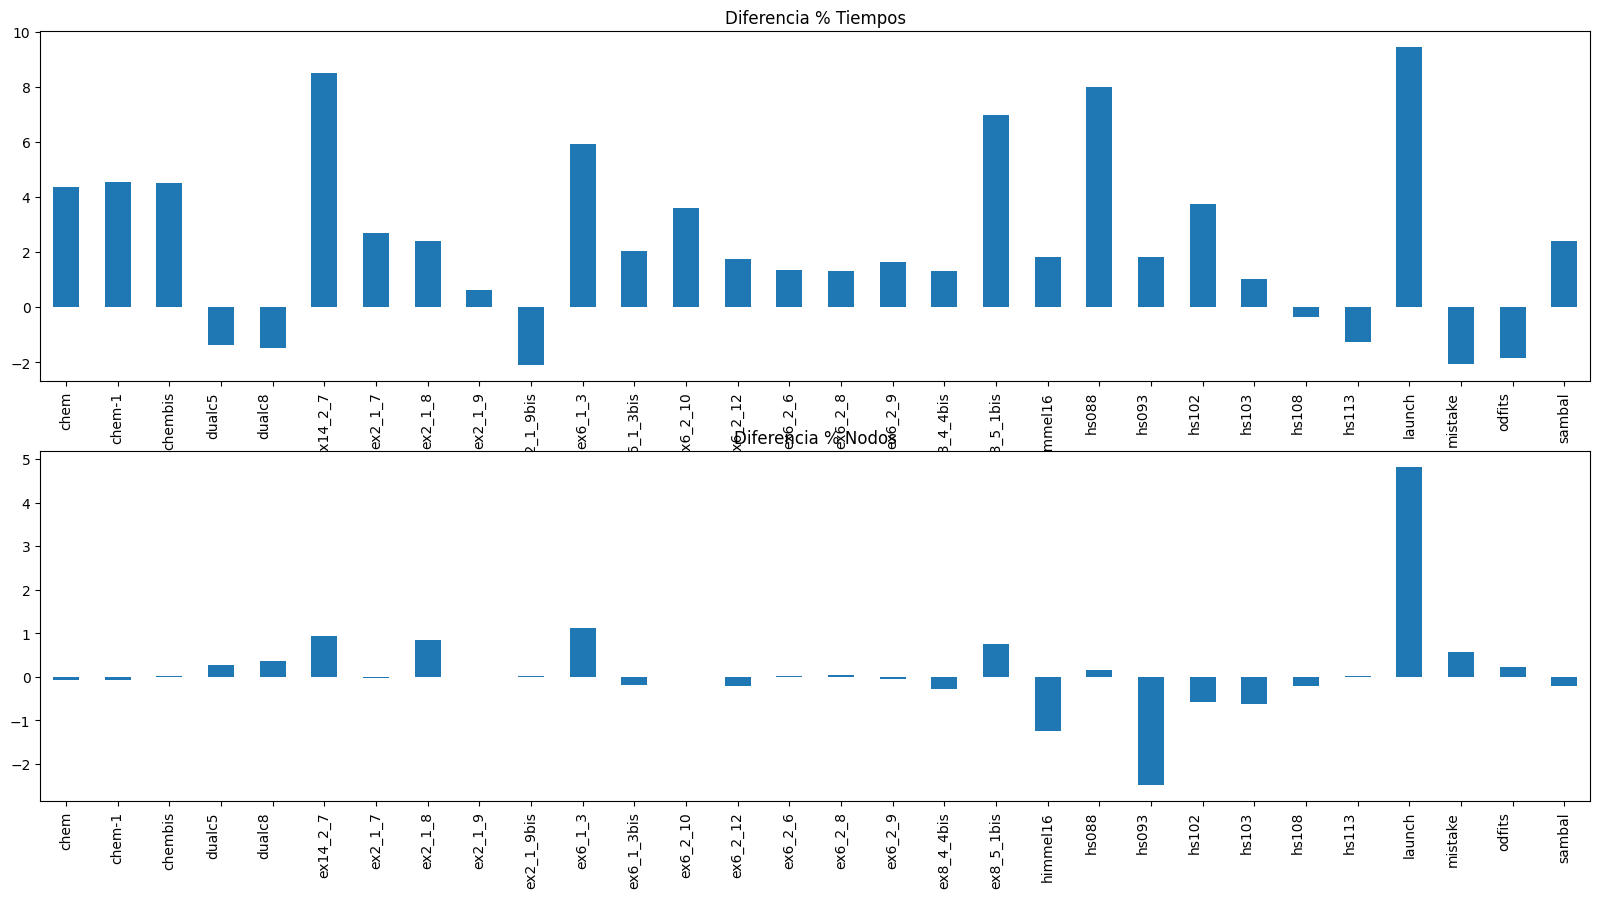

In [120]:
# graficar diferencias
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos']['Diferencia'].plot(kind='bar', ax=axs[0])
data['Nodos']['Diferencia'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Diferencia % Tiempos')
axs[1].set_title('Diferencia % Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()

In [121]:
# sacar promedio de diferencias
promedio_diferencias = {sheet: data[sheet]['Diferencia'].mean() for sheet in sheet_names}
promedio_diferencias

{'Tiempos': np.float64(2.369553666073825),
 'Nodos': np.float64(0.12826488231810781)}

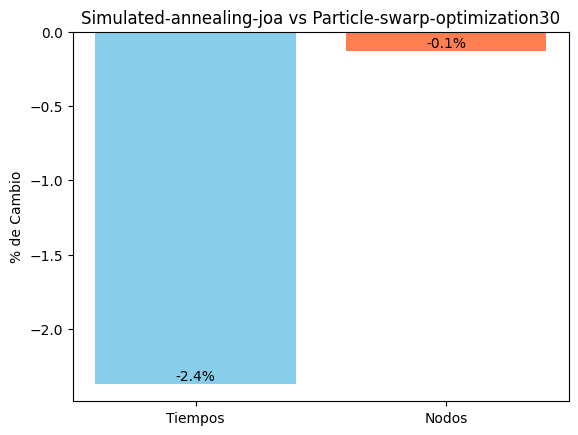

In [122]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Multiplicar los promedios por -1
promedio_diferencias_negativos = {k: -v for k, v in promedio_diferencias.items()}

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_diferencias_negativos.keys(), promedio_diferencias_negativos.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('% de Cambio')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}%', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

In [123]:
# Calculo de Speed Up
for sheet in sheet_names:
    data[sheet]['Speed Up'] = data[sheet][columnas[0]] / data[sheet][columnas[1]]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Simulated-annealing-joa  Particle-swarp-optimization30  \
 0                  0.153347                       0.213659   
 1                  0.154700                       0.230626   
 2                  0.147300                       0.234249   
 3                  0.229668                       0.276441   
 4                  0.115384                       0.279111   
 5                  0.074869                       0.235273   
 6                  0.281703                       0.208459   
 7                  0.270188                       0.233362   
 8                  0.311038                       0.217679   
 9                  0.343489                       0.274174   
 10                 0.160381                       0.246611   
 11                 0.155700                       0.256640   
 12                 0.157646                       0.237522   
 13                 0.162444                       0.253731   
 14                 0.177960                

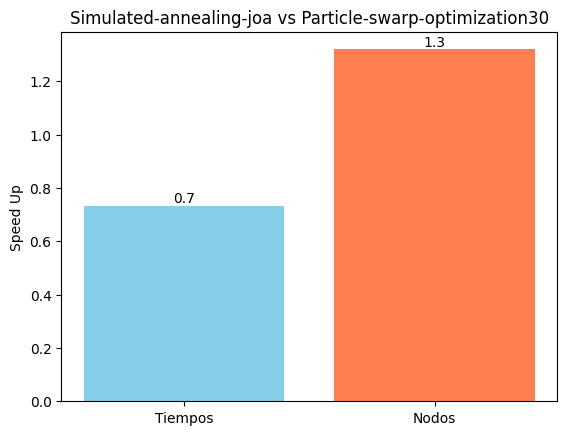

In [124]:
# Promedio de Speed Up
promedio_speed_up = {sheet: data[sheet]['Speed Up'].mean() for sheet in sheet_names}
promedio_speed_up

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_speed_up.keys(), promedio_speed_up.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('Speed Up')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()